# Problem set 1: Printing and plotting

**Table of contents**<a id='toc0_'></a>    
- 1. [define function](#toc1_)    
- 2. [print to screen (table)](#toc2_)    
- 3. [write the output to `table_output.txt`](#toc3_)    
- 4. [read `table_output.txt` and print content to screen](#toc4_)    
- 5. [2d plot indifference curves](#toc5_)    
- 6. [3d plots](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Imports you will need:

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D # for 3D plots
from matplotlib import cm # for colormap

# predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

**Note:** Answers are in A*.py files.

## 1. <a id='toc1_'></a>[define function](#toc0_)

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-/beta} + (1-/alpha) x_2^{-/beta})^{-1//beta} 
$$

where `x1` and `x2` are *positional arguments*, and `alpha`and `beta` are *keyword arguments* with default arguments $/alpha=0.5$ and $/beta=1$.

In [28]:
# write your own code here
def u_func(x_1,x_2,alpha=0.5,beta=1):
    return (alpha*x_1**(-beta) + (1-alpha)*x_2**(-beta))**(-1/beta)

## 2. <a id='toc2_'></a>[print to screen (table)](#toc0_)

In [29]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `gen_table(x1_vec,x2_vec,u_func)` to print values of `u(x1,x2)` in the table form shown below.

In [30]:
# update this code

def gen_table(x1_vec,x2_vec,u_func):
    
    # a. empty text
    text = ''
    
    # b.1 title
    text += f'''Vores flotte tabel:)\n--------------------\n'''

    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:5d} ' 
    text += '\n' # line shift
    
    # c. body
    # missing lines
    for i, x1 in enumerate(x1_vec):
        text += f'{i}  '

        for x2 in x2_vec:
            u = u_func(x1,x2)
            text += f'{u:.3f} '
        
        if i != x1_vec[-1]:
            text += '\n'
    
    # d. print
    return text

table = gen_table(x1_vec,x2_vec,u_func)
print(table)

Vores flotte tabel:)
--------------------
       0     1     2     3     4 
0  1.050 1.162 1.442 1.479 1.569 
1  1.162 1.300 1.661 1.711 1.832 
2  1.442 1.661 2.300 2.396 2.641 
3  1.479 1.711 2.396 2.500 2.768 
4  1.569 1.832 2.641 2.768 3.100 



In [31]:
# from A1 import u_func as u_func_answer
# from A2 import gen_table as gen_table_answer
# print(gen_table_answer(x1_vec,x2_vec,u_func_answer))

## 3. <a id='toc3_'></a>[write the output to `table_output.txt`](#toc0_)

In [32]:
# write your code here
save_path = 'C:/Users/caspe/OneDrive - University of Copenhagen/Undervisning/ProgEconClass3/problemsets_solutions/output'
# eller alternativt med dobbelt backslash:
save_path = 'C:\\Users\\caspe\\OneDrive - University of Copenhagen\\Undervisning\\ProgEconClass3\\problemsets_solutions\\output'#

with open(f'{save_path}/A3_cmo.txt', 'w') as file:
    file.write(table)

## 4. <a id='toc4_'></a>[read `table_output.txt` and print content to screen](#toc0_)

In [33]:
# write your code here
read_path = save_path

with open(f'{read_path}/A3_cmo.txt', 'r') as file:
    x = file.read()

print(x)

Vores flotte tabel:)
--------------------
       0     1     2     3     4 
0  1.050 1.162 1.442 1.479 1.569 
1  1.162 1.300 1.661 1.711 1.832 
2  1.442 1.661 2.300 2.396 2.641 
3  1.479 1.711 2.396 2.500 2.768 
4  1.569 1.832 2.641 2.768 3.100 



## 5. <a id='toc5_'></a>[2d plot indifference curves](#toc0_)

The formula for the indifference curves of $u(x_1,x_2)$ is:

$$
x_2(x_1, u) = \left( \frac{u^{-\beta} - \alpha x_1^{-\beta}}{1-\alpha} \right)^{-1/\beta}
$$

for 

$$
\log(x_1) > \log(u) + \log(\alpha)/\beta
$$

Produce a figure like the one below and save to disc.

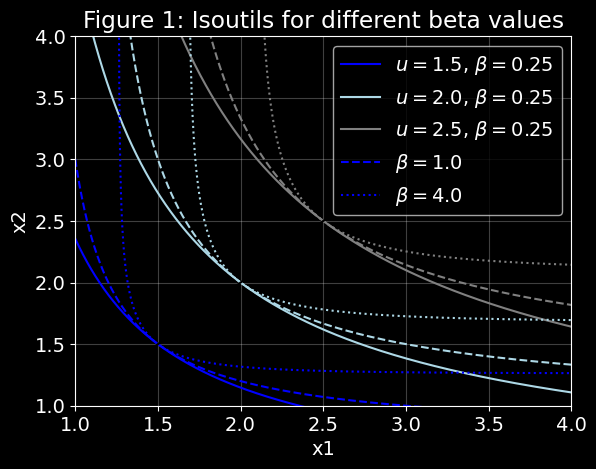

In [34]:
# these values were used
alpha = 0.5 
betas = [0.25, 1.0, 4.0]
uvals = [1.5, 2.0, 2.5] # values of u

# write your code here
import numpy as np
import matplotlib.pyplot as plt

def x2_func(x1,u,alpha=0.5,beta=1.0):
    try:
        return ((u**(-beta)-alpha*x1**(-beta))/(1-alpha))**(-1/beta)
    except:
        return np.nan

x1 = np.linspace(0.9,4.0,10000)

colors = ['blue','lightblue','grey']
linestyles = ['-','--',':']
plt.style.use('dark_background')
for i, beta in enumerate(betas):

    for j, u in enumerate(uvals):

        indicator = np.log(x1) > np.log(u) + np.log(alpha)/beta

        x1_allowed = x1[indicator]
        x2 = x2_func(x1_allowed,u,alpha,beta)

        if i == 0:
            label = fr'$u = {u}$, $\beta = {beta}$'
        elif j == 0:
            label = fr'$\beta = {beta}$'
        else:
            label = ''

        plt.plot(x1_allowed, x2, label=label, color=colors[j], linestyle=linestyles[i])

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.plot([1,4.0],[1,4.0], color = 'black', linestyle='-')
plt.xlim([1,4.0])
plt.ylim([1,4.0])
plt.title('Figure 1: Isoutils for different beta values')
plt.show()

In [35]:
# import A5
# A5.plot(alpha,betas,uvals)

**Hint:** To check your implementation of `x2(x1,u,alpha,beta)` you can use the code below.

In [36]:
x1_ = 2.0
x2_ = 1.5
u_ = u_func(x1_,x2_,alpha=alpha,beta=betas[0])
x2_implied = x2_func(x1_,u_,alpha=alpha,beta=betas[0])
assert np.isclose(x2_,x2_implied)

## 6. <a id='toc6_'></a>[3d plot of utility function](#toc0_)

Reproduce the figures below of $u(x_1,x_2)$ using:

1. the `meshgrid` function from *numpy* 
1. the `.plot_countour`, `.plot_surface` and `.plot` axis methods from *matplotlib*.

where the black lines are indifference curves for $u \in \{1,2,3\}$.

**Hint:** You can look at the documentation.

In [37]:
#?np.meshgrid

In [38]:
# these values were used
alpha = 0.75
beta = 0.5
x1_vec = np.linspace(0.1,4,1000)
x2_vec = np.linspace(0.1,4,1000)
uvals = [1.0,2.0,3.0]

# write your code here

# x1_grid,x2_grid = 
# u_grid = 

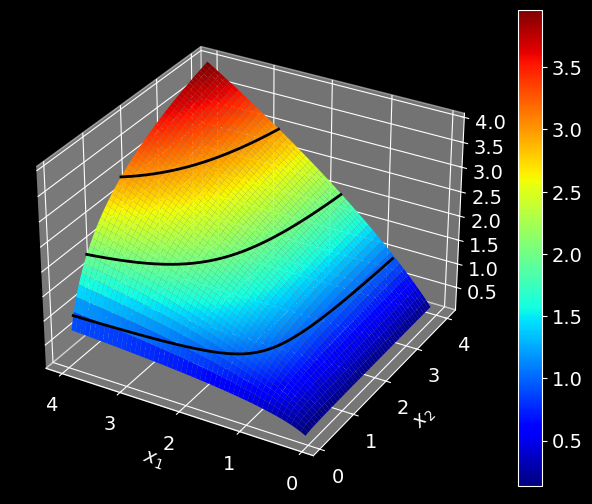

In [ ]:
def plot(x1_vec,x2_vec,alpha,beta,uvals):
    # dark theme
    plt.style.use('dark_background')

    # a. calculate
    x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
    u_grid = u_func(x1_grid,x2_grid,alpha=alpha,beta=beta)

    # b. plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1,projection='3d')

    # i. main
    h = ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet)
    fig.colorbar(h)

    # ii. indifference curves
    for uval in uvals:

        I = np.log(x1_vec) > np.log(uval) + np.log(alpha)/beta
        x1_vec_ = x1_vec[I]
        x2_vec_ = x2_func(x1_vec_,uval,alpha=alpha,beta=beta)

        J = x2_vec_ < x2_vec[-1] 
        uval_vec_ = uval*np.ones_like(x2_vec_[J])
        ax.plot(x1_vec_[J],x2_vec_[J],uval_vec_,lw=2,color='black',zorder=99)

    # c. add labels
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # c. invert xaxis to bring origin in center front
    ax.invert_xaxis()
    fig.tight_layout(pad=0.1)

plot(x1_vec,x2_vec,alpha,beta,uvals)